In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


1.PNG has been resized to (100, 100).


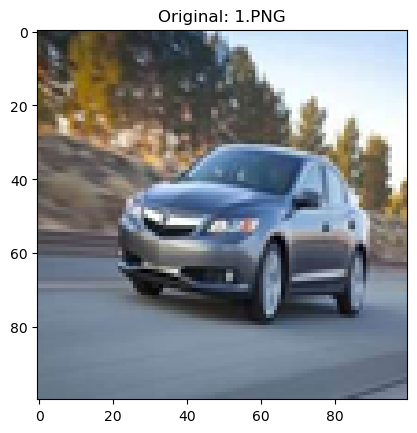

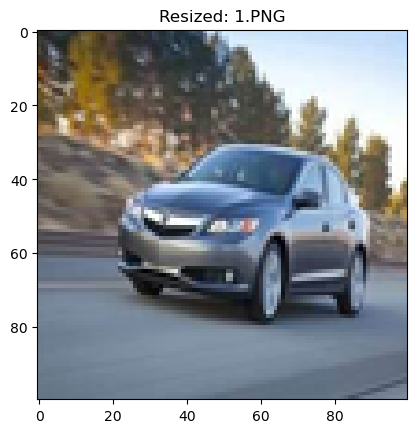

2.PNG has been resized to (100, 100).


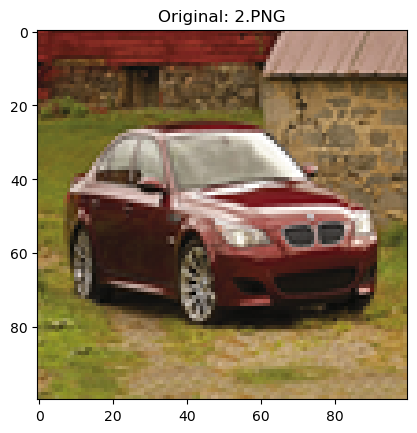

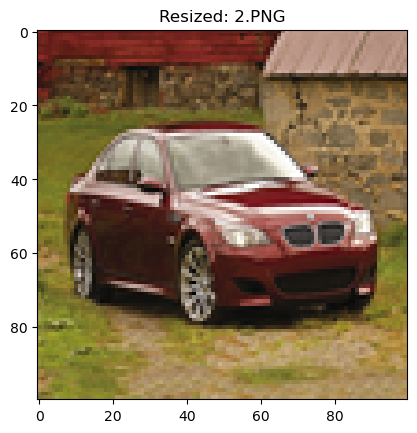

3.PNG has been resized to (100, 100).


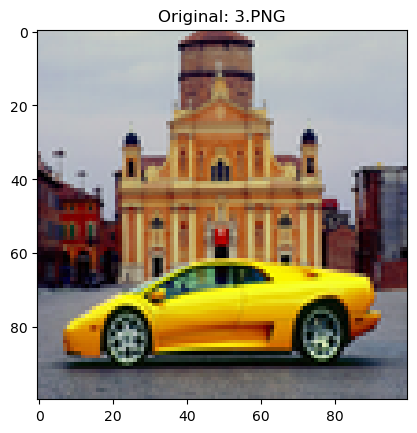

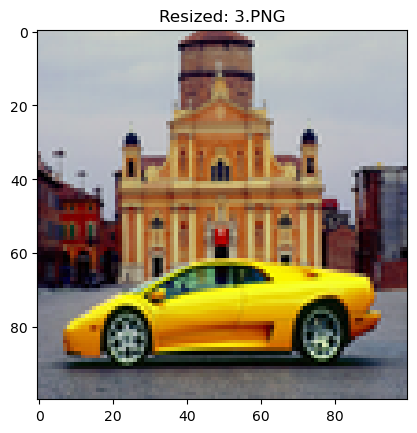

4.PNG has been resized to (100, 100).


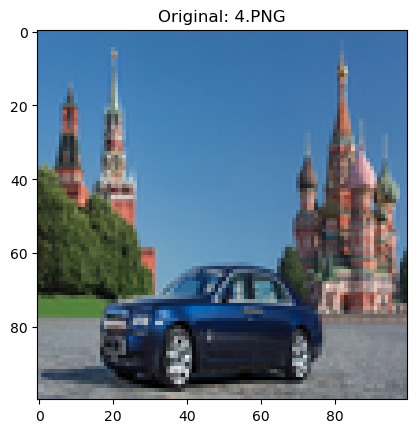

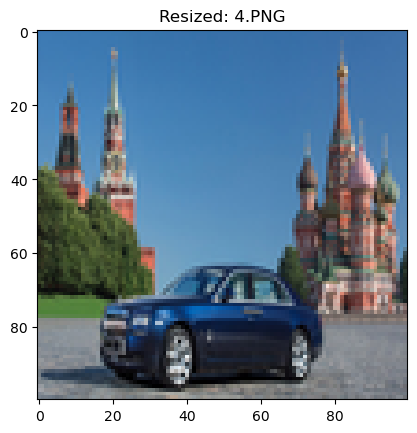

5.PNG has been resized to (100, 100).


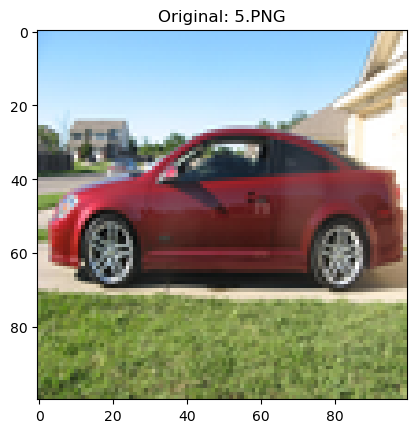

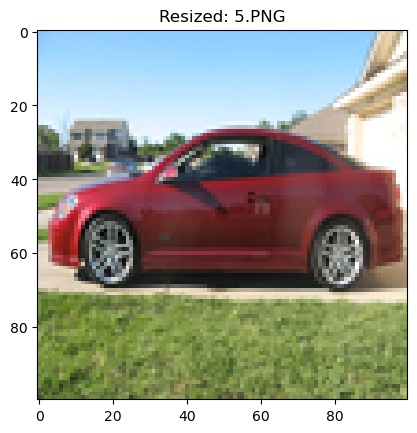

6.PNG has been resized to (100, 100).


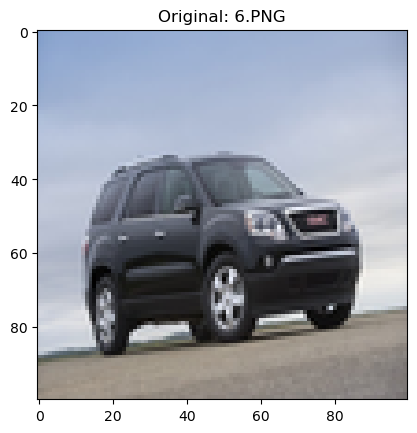

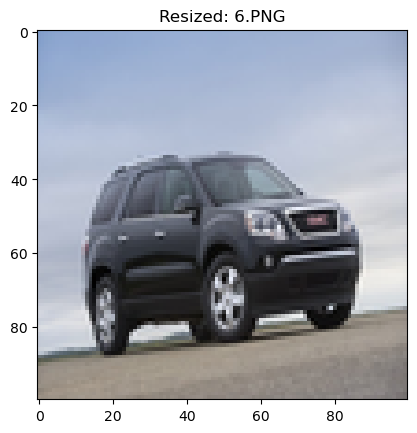

7.PNG has been resized to (100, 100).


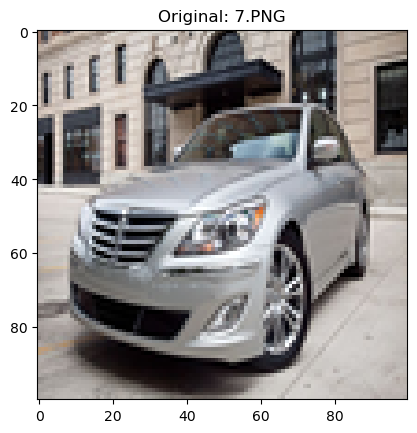

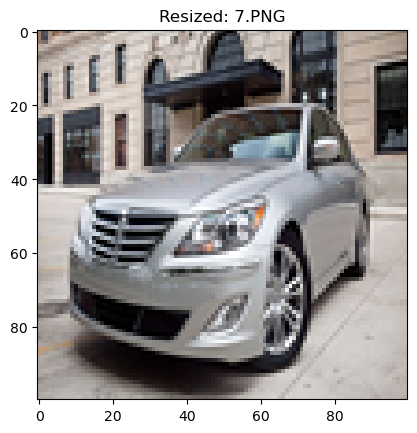

8.PNG has been resized to (100, 100).


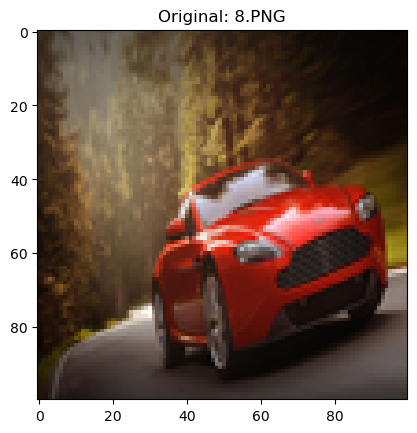

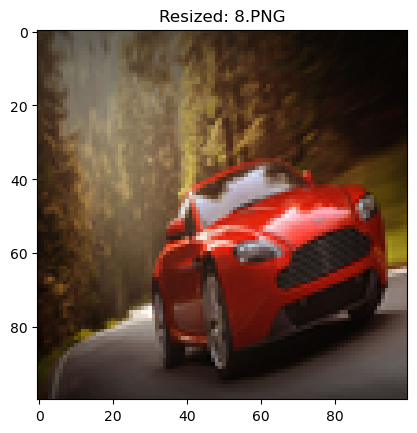

9.PNG has been resized to (100, 100).


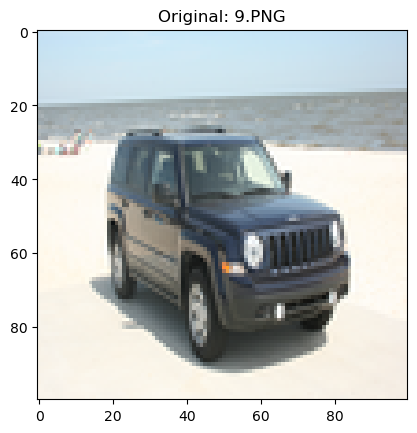

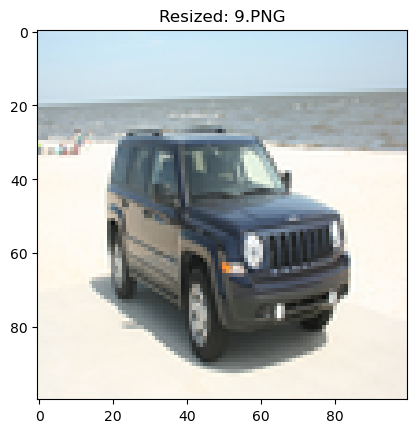

10.PNG has been resized to (100, 100).


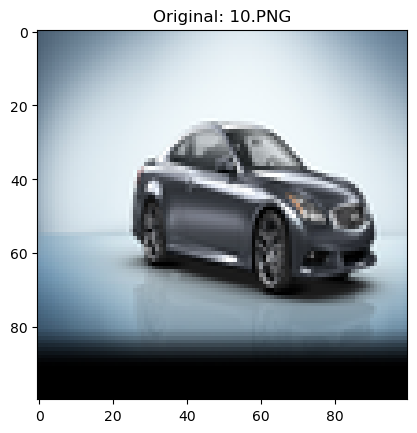

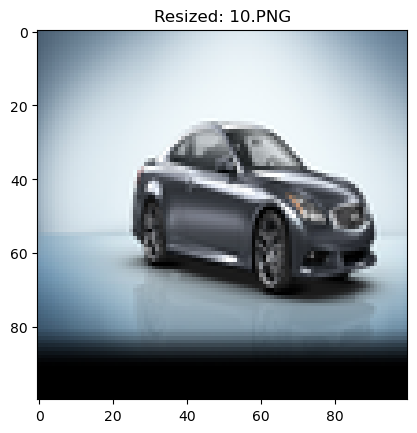

In [17]:
#Q1 Read in all of the 10 images in python, resize each of them a 100 by 100 pixels format

from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt 

# Function to extract the numerical part of the filename for sorting
def numerical_sort(filename):
    parts = filename.split('.')
    return int(parts[0]) if parts[0].isdigit() else filename

# Path to the directory containing the images
image_directory = 'C:\\Users\\PC\\Desktop\\AUD\\assignment2\\image'
image_files = sorted([f for f in os.listdir(image_directory) if f.endswith('.PNG')], key=numerical_sort)

# Initialize a dictionary to hold the resized images
resized_images = {}

# Read and resize the images to 100x100 pixels
for image_file in image_files:
    image_path = os.path.join(image_directory, image_file)
    with Image.open(image_path) as img:
        resized_img = img.resize((100, 100))
        resized_images[image_file] = np.array(resized_img)
        print(f"{image_file} has been resized to {resized_img.size}.")

        # Display the original and resized images (optional, you might want to save them instead)
        plt.imshow(img)
        plt.title(f"Original: {image_file}")
        plt.show()
        plt.imshow(resized_img)
        plt.title(f"Resized: {image_file}")
        plt.show()


1.PNG has been resized, converted to grayscale, and flattened.
Shape of the grayscale image array: (100, 100)
Shape of the flattened array: (10000,)
2.PNG has been resized, converted to grayscale, and flattened.
Shape of the grayscale image array: (100, 100)
Shape of the flattened array: (10000,)
3.PNG has been resized, converted to grayscale, and flattened.
Shape of the grayscale image array: (100, 100)
Shape of the flattened array: (10000,)
4.PNG has been resized, converted to grayscale, and flattened.
Shape of the grayscale image array: (100, 100)
Shape of the flattened array: (10000,)
5.PNG has been resized, converted to grayscale, and flattened.
Shape of the grayscale image array: (100, 100)
Shape of the flattened array: (10000,)
6.PNG has been resized, converted to grayscale, and flattened.
Shape of the grayscale image array: (100, 100)
Shape of the flattened array: (10000,)
7.PNG has been resized, converted to grayscale, and flattened.
Shape of the grayscale image array: (100, 1

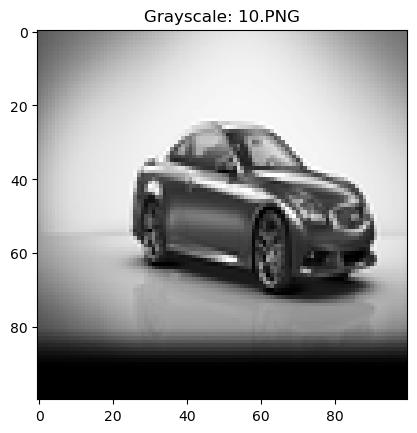

In [18]:
#Q2 Convert them to greyscale arrays (no color information needs to be kept,so the arrays will be 2-D).

from PIL import Image
import numpy as np
import os

# Function to extract the numerical part of the filename for sorting
def numerical_sort(filename):
    parts = filename.split('.')
    return int(parts[0]) if parts[0].isdigit() else filename

# Path to the directory containing the images
image_directory = 'C:\\Users\\PC\\Desktop\\AUD\\assignment2\\image'
image_files = sorted([f for f in os.listdir(image_directory) if f.endswith('.PNG')], key=numerical_sort)

# Initialize a list to hold the flattened grayscale images
flattened_greyscale_images = []

# Read, resize, convert to grayscale, and flatten the images
for image_file in image_files:
    image_path = os.path.join(image_directory, image_file)
    with Image.open(image_path) as img:
        # Resize the image
        resized_img = img.resize((100, 100))
        # Convert the resized image to grayscale
        greyscale_img = resized_img.convert('L')
        # Convert the grayscale image to a NumPy array
        greyscale_array = np.array(greyscale_img)
        # Flatten the grayscale image array
        im_v = greyscale_array.flatten()
        # Append the flattened grayscale image to the list
        flattened_greyscale_images.append(im_v)
        
        # Print confirmation messages
        print(f"{image_file} has been resized, converted to grayscale, and flattened.")
        print("Shape of the grayscale image array:", greyscale_array.shape)
        print("Shape of the flattened array:", im_v.shape)
        
        # Display the grayscale image
        plt.imshow(greyscale_array, cmap='gray')
        plt.title(f"Grayscale: {image_file}")
#         plt.show()

# Now flattened_greyscale_images contains all the flattened grayscale image arrays


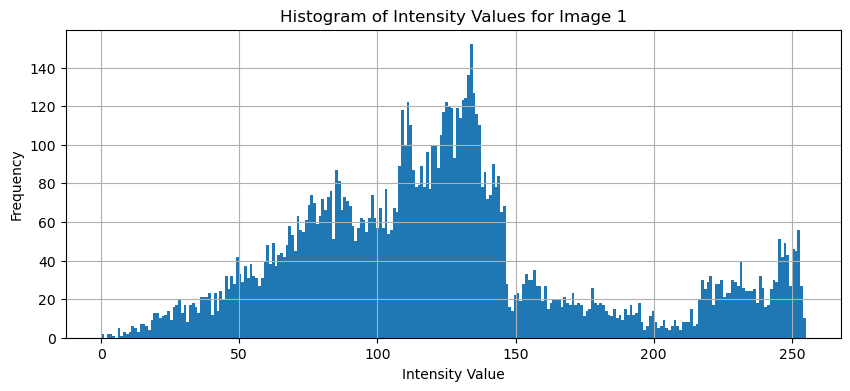

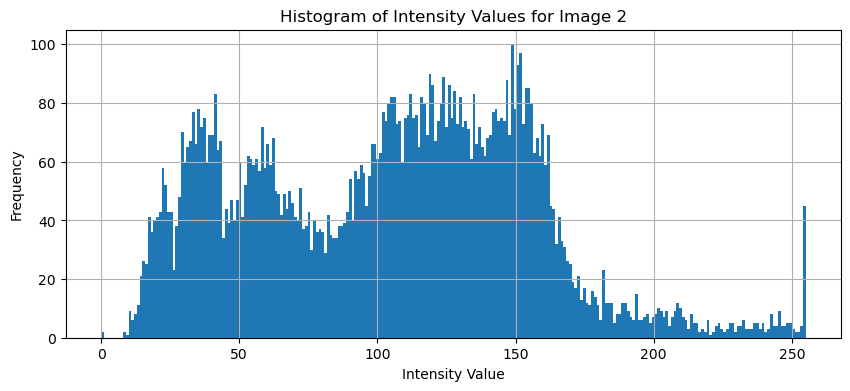

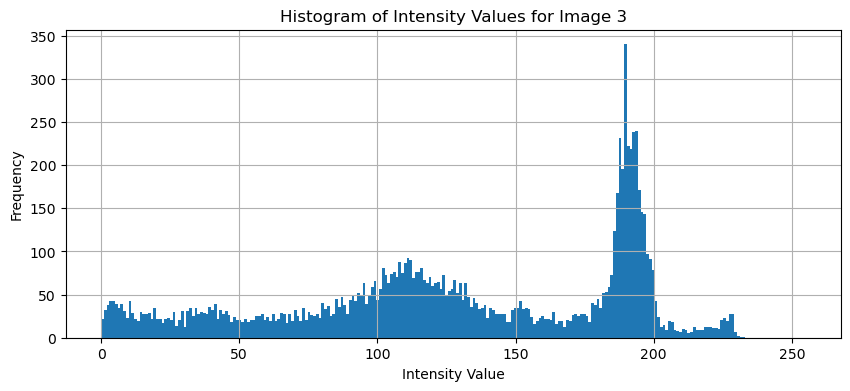

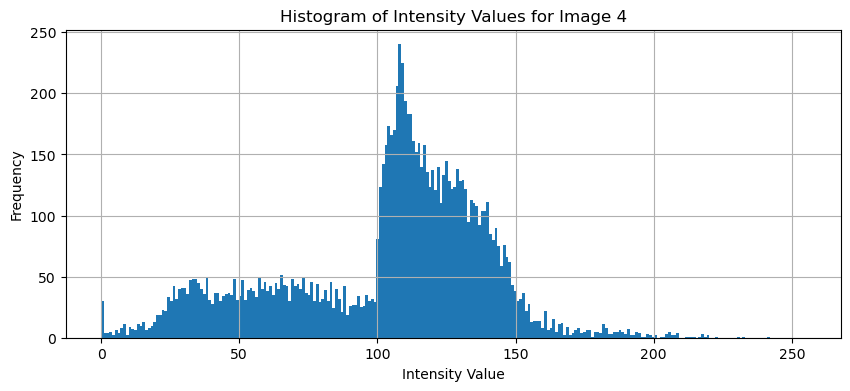

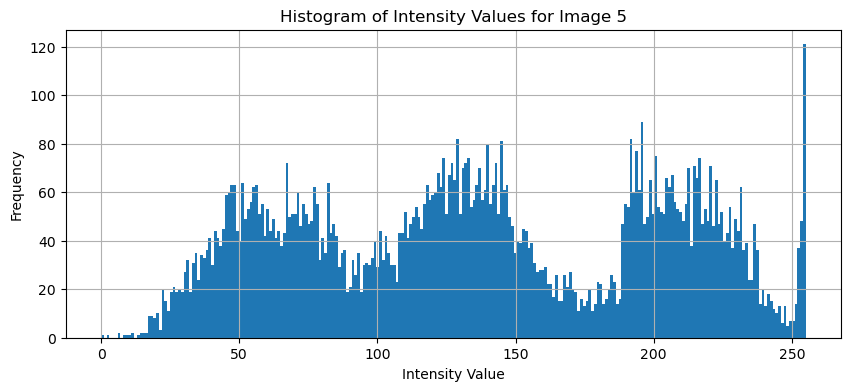

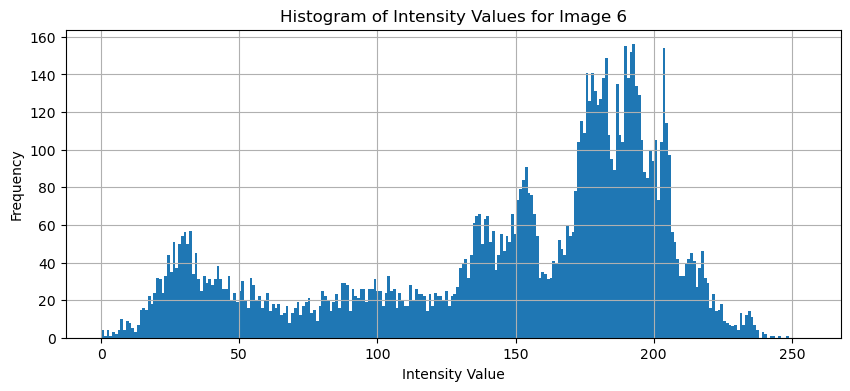

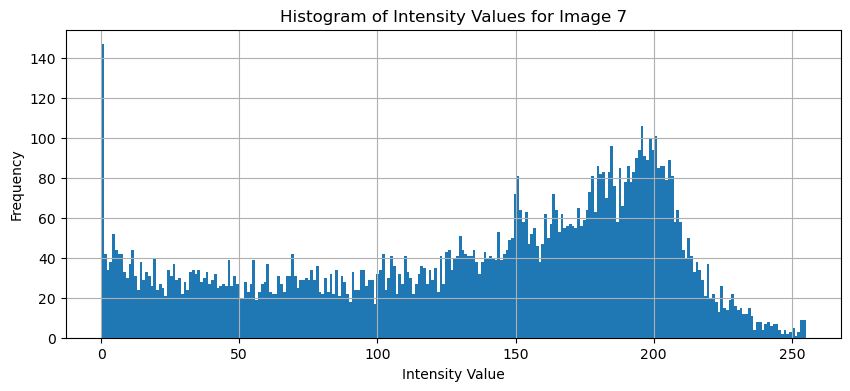

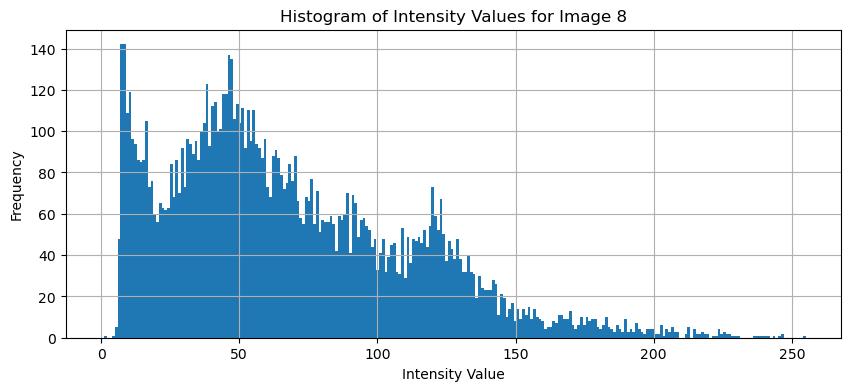

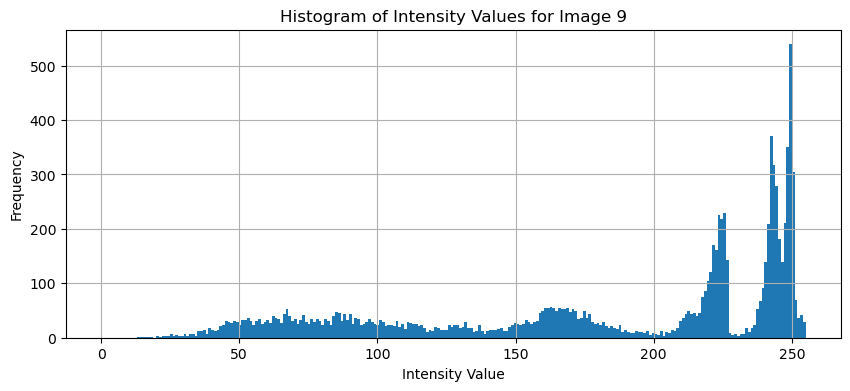

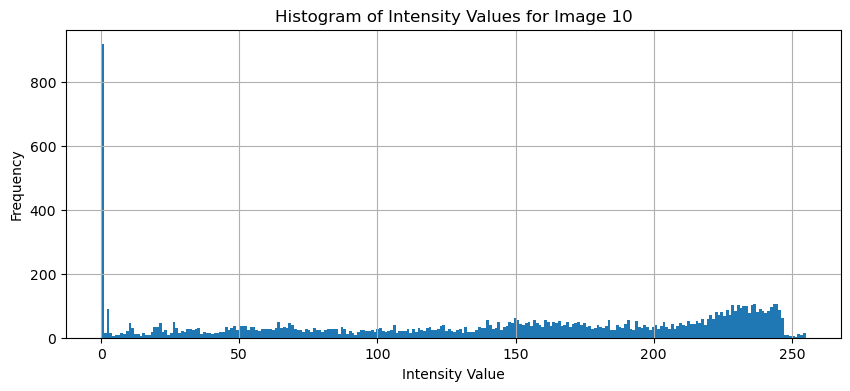

CSV Dimensions: 10 rows x 10000 columns
Flattened grayscale images have been saved to flattened_images.csv.


In [14]:
#Q3 flatten the 2-D array to a 1-D array, draw a histogram to present the intensity value distribution for each image.

import matplotlib.pyplot as plt
import numpy as np
import csv

# Assuming flattened_greyscale_images contains the flattened grayscale image arrays

# Prepare to write the flattened arrays to a CSV file
csv_filename = "flattened_images.csv"
with open(csv_filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)

    # Iterate over each flattened grayscale image
    for i, flattened_array in enumerate(flattened_greyscale_images):
        # Write the flattened array to the CSV file as a row
        csv_writer.writerow(flattened_array)

        # Create a histogram for the intensity values of the flattened image
        plt.figure(figsize=(10, 4))
        plt.hist(flattened_array, bins=256, range=(0, 255))
        plt.title(f"Histogram of Intensity Values for Image {i+1}")
        plt.xlabel('Intensity Value')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

# Track the number of rows and columns
num_rows = len(flattened_greyscale_images)
num_columns = len(flattened_greyscale_images[0]) if num_rows > 0 else 0

# Print the dimensions of the CSV file
print(f"CSV Dimensions: {num_rows} rows x {num_columns} columns")

# Notify when the CSV file writing is complete
print(f"Flattened grayscale images have been saved to {csv_filename}.")


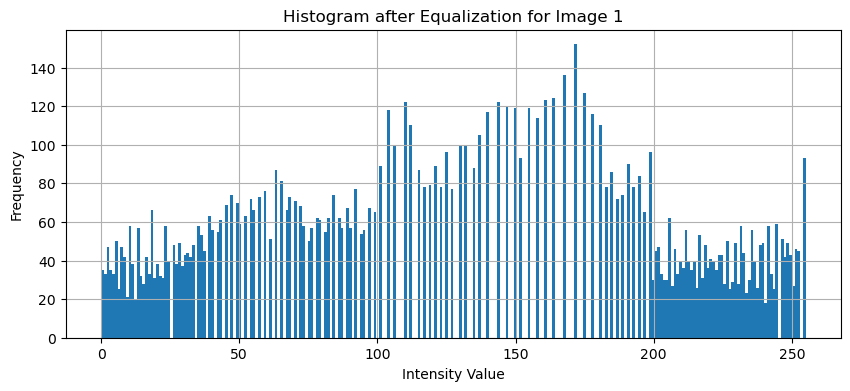

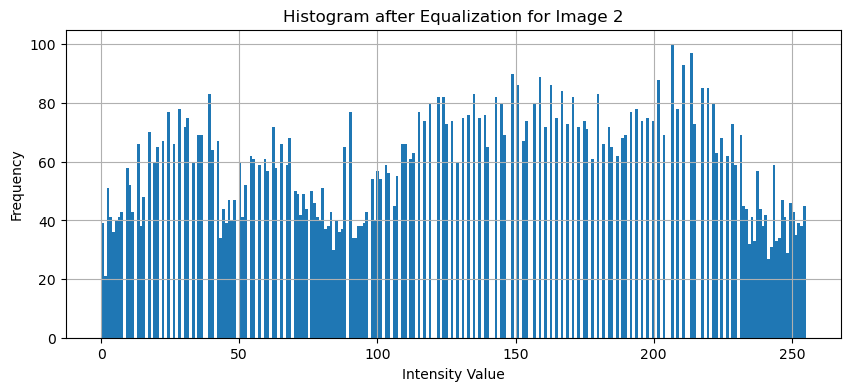

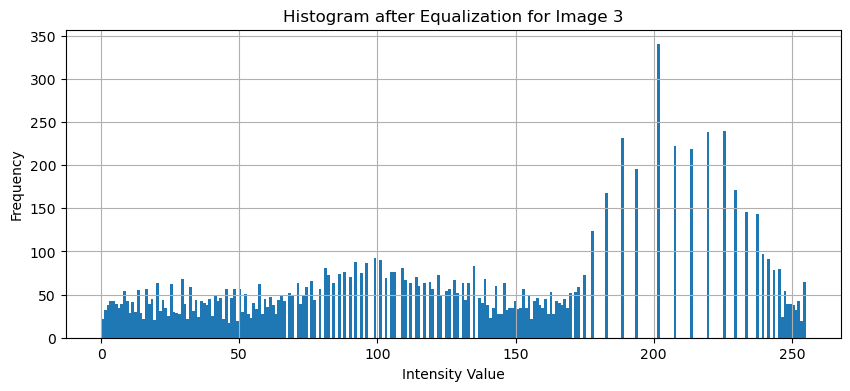

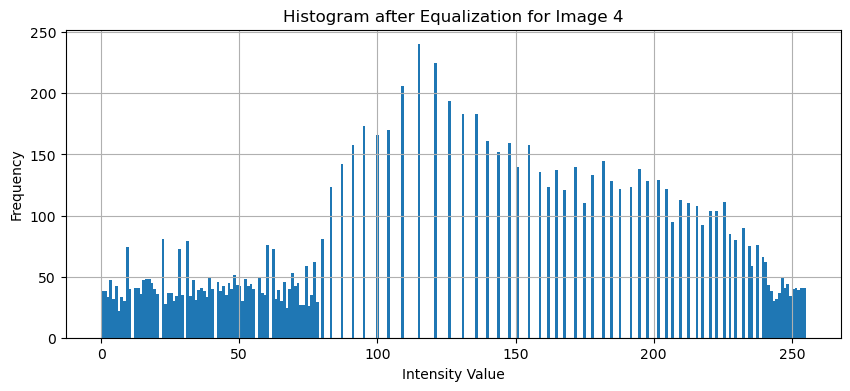

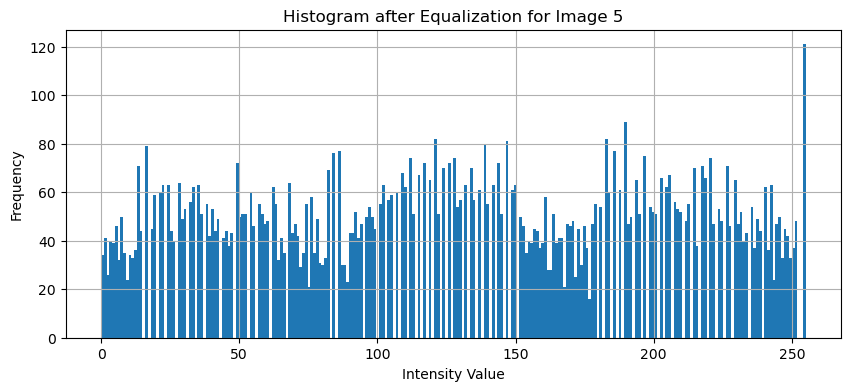

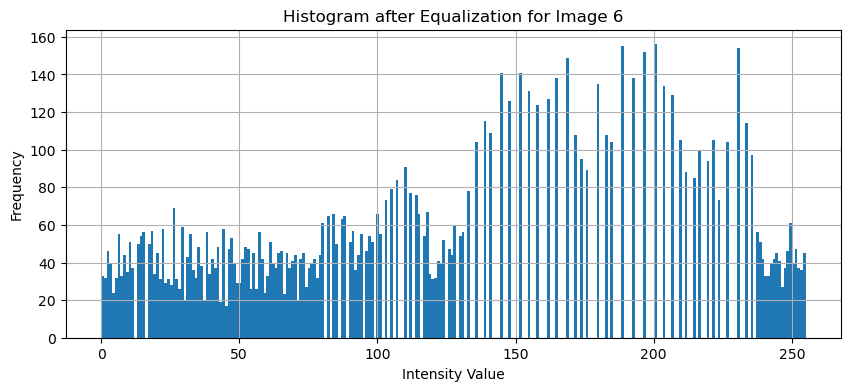

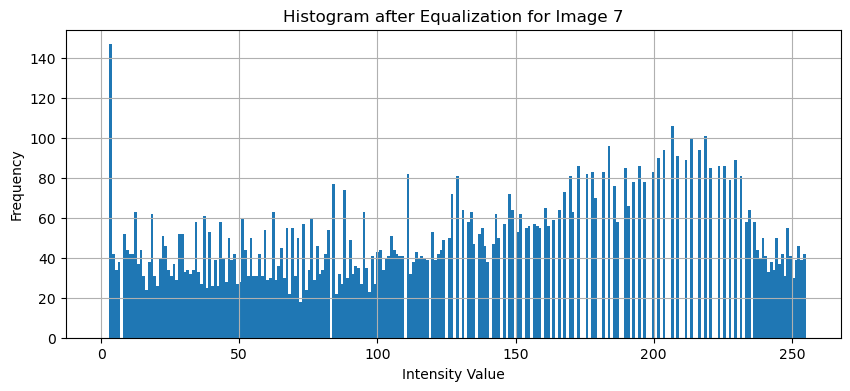

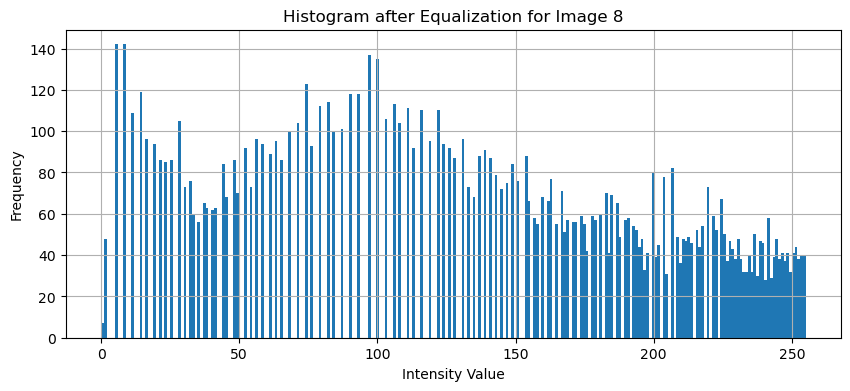

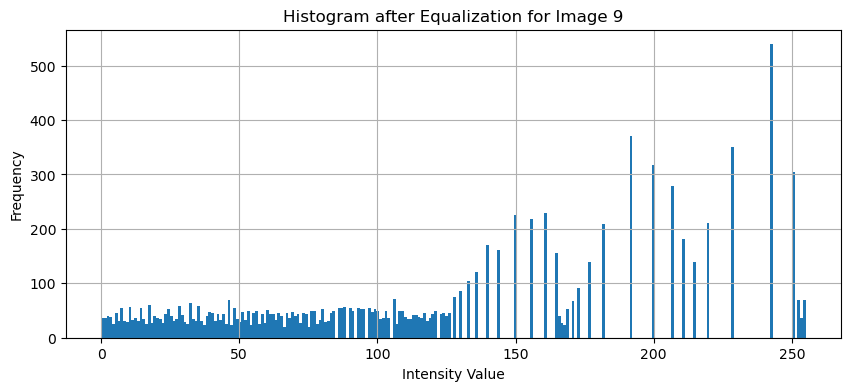

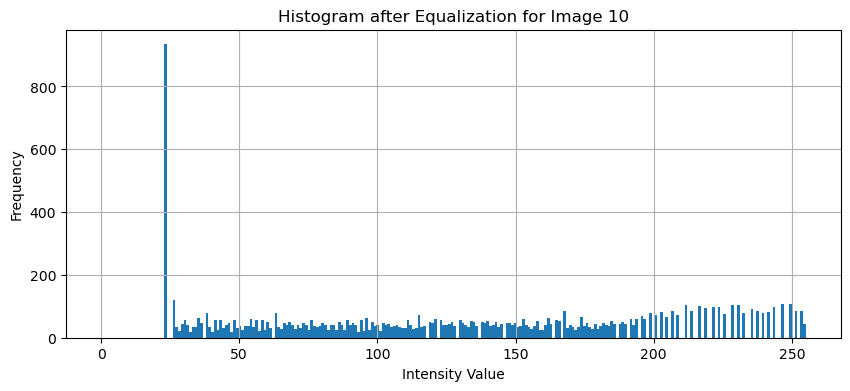

In [15]:
# Q4 Conduct a histogram equalization to normalize each image, draw a histogram to present the intensity value distribution of each image after the normalization

import numpy as np
import matplotlib.pyplot as plt

# Iterate over each flattened grayscale image
for i, flattened_array in enumerate(flattened_greyscale_images):
    # Calculate the histogram of the original image
    original_hist, bins = np.histogram(flattened_array, bins=256, range=[0, 256])

    # Compute the cumulative distribution function (CDF)
    cdf = original_hist.cumsum()
    # Normalize the CDF
    cdf_normalized = cdf * 255 / cdf[-1]

    # Use the normalized CDF to map the old intensity values to the equalized ones
    image_equalized = np.interp(flattened_array, bins[:-1], cdf_normalized)

    # Plot the histogram for the equalized image
    plt.figure(figsize=(10, 4))
    plt.hist(image_equalized, bins=256, range=(0, 255))
    plt.title(f"Histogram after Equalization for Image {i+1}")
    plt.xlabel('Intensity Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    

Q5 Compare the histogram in step 4 with step 3, discuss what the difference is

The histograms from step 3 represent the intensity distributions of the images before histogram equalization, while the histograms from step 4 show the distributions after equalization.

Before equalization (step 3), the intensity values of the images were concentrated in specific ranges, indicating that certain brightness levels were more prevalent, while others were less represented. This often leads to images with poor contrast, where details can be lost in shadows or highlights.

After equalization (step 4), the intensity values are redistributed to cover the entire available range more evenly. This typically enhances the overall contrast of the images, making details more visible, especially in areas that were previously too dark or too light. The peaks and valleys in the histograms of step 4 are more leveled, and there is a reduced occurrence of extreme highs and lows in intensity counts.

In summary, histogram equalization aims to improve the contrast and details of an image by spreading out the most frequent intensity values, which can be seen in the flatter and more uniform histograms post-equalization

In [6]:
#Q1 Transform those reviews into a term-document matrix, lemmatize all the words, remove the stop-words and punctuations, 
# set the minimal document frequency for each term to be 5 and include unigram and bi-gram

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import nltk

# Load your dataset
data = pd.read_excel('C:\\Users\\PC\\Desktop\\AUD\\assignment2\\Assignment 2 text.xlsx')

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess, lemmatize, and remove stop words and punctuations
def preprocess_and_lemmatize(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    return ' '.join([lemmatizer.lemmatize(word) for word in text.lower().split() if word not in stop_words])

# Preprocess the reviews
data['processed_review'] = data['review'].apply(preprocess_and_lemmatize)

# Create a CountVectorizer for unigrams and bigrams, with a minimum document frequency of 5
vectorizer = CountVectorizer(min_df=5, ngram_range=(1, 2))
term_document_matrix = vectorizer.fit_transform(data['processed_review'])


# Display the shape of the term-document matrix
print("Shape of the term-document matrix:", term_document_matrix.shape)

# Display the first 10 features/terms of the matrix
print("First 10 features/terms:", vectorizer.get_feature_names_out()[:10])

# Display the first 5 rows of the term-document matrix as an example
# Converting the sparse matrix to a dense format for display
print("First 5 rows of the term-document matrix:")
pd.DataFrame(term_document_matrix.toarray(), columns=vectorizer.get_feature_names_out()).head()


Shape of the term-document matrix: (1000, 5973)
First 10 features/terms: ['10' '10 year' '100' '100 baht' '1000' '10000' '11' '110' '1100' '11th']
First 5 rows of the term-document matrix:


,10,10 year,100,100 baht,1000,10000,11,110,1100,11th,...,zhou,zhu,zombie,zone,²à,½ï,è½,è½ quot,è½ è½,œthe
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Q2 use the LDA model to extract the topics of each document assuming there are 6 topics

from sklearn.decomposition import LatentDirichletAllocation

# Assuming the term_document_matrix is already created

# Number of topics
n_topics = 6

# Create an instance of LDA
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)

# Fit the LDA model to your term-document matrix
lda.fit(term_document_matrix)

# Display the topics
for index, topic in enumerate(lda.components_):
    print(f"Top words for topic #{index}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print("\n")


Top words for topic #0:
['high', 'also', 'body', 'people', 'food', 'li', 'song', 'oil', 'water', 'dynasty']


Top words for topic #1:
['people', 'character', 'war', 'audience', 'two', 'love', 'story', 'also', 'movie', 'film']


Top words for topic #2:
['quotthe', 'world', 'one', 'human', 'life', 'story', 'time', 'book', 'also', 'people']


Top words for topic #3:
['want', 'think', 'one', 'good', 'also', 'time', 'like', 'life', 'love', 'people']


Top words for topic #4:
['price', 'menu', 'shop', 'food', 'taste', 'restaurant', 'like', 'delicious', 'eat', 'good']


Top words for topic #5:
['doll', 'girl', 'bear', 'like', 'soon', 'zhao', 'cat', 'zhou', 'woman', 'zhang']




In [10]:
# Q3 Assuming 'lda' is your trained LDA model and 'vectorizer' is the used vectorizer
def get_topic_keywords(topic_model, vectorizer, n_top_words=10):
    # Get feature names (words) from the vectorizer
    feature_names = vectorizer.get_feature_names_out()
    
    # Extract the top words for each topic
    top_words = {}
    for topic_idx, topic in enumerate(topic_model.components_):
        top_words[topic_idx] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    return top_words

# Get top words for each topic
topic_keywords = get_topic_keywords(lda, vectorizer)

# Function to get a string description of the top topics
def topic_description(topic_index):
    return f"Topic {topic_index + 1}: " + ", ".join(topic_keywords[topic_index])

# Then modify your printing section
print("Top 2 topics for first 10 restaurant reviews:")
for i, topics in enumerate(top_two_topics_restaurant):
    print(f"Review {i+1}: {topic_description(topics[0])}, {topic_description(topics[1])}")

print("\nTop 2 topics for first 10 movie reviews:")
for i, topics in enumerate(top_two_topics_movie):
    print(f"Review {i+1}: {topic_description(topics[0])}, {topic_description(topics[1])}")


Top 2 topics for first 10 restaurant reviews:
Review 1: Topic 5: good, eat, delicious, like, restaurant, taste, food, shop, menu, price, Topic 1: dynasty, water, oil, song, li, food, people, body, also, high
Review 2: Topic 5: good, eat, delicious, like, restaurant, taste, food, shop, menu, price, Topic 3: people, also, book, time, story, life, human, one, world, quotthe
Review 3: Topic 5: good, eat, delicious, like, restaurant, taste, food, shop, menu, price, Topic 1: dynasty, water, oil, song, li, food, people, body, also, high
Review 4: Topic 5: good, eat, delicious, like, restaurant, taste, food, shop, menu, price, Topic 3: people, also, book, time, story, life, human, one, world, quotthe
Review 5: Topic 5: good, eat, delicious, like, restaurant, taste, food, shop, menu, price, Topic 4: people, love, life, like, time, also, good, one, think, want
Review 6: Topic 5: good, eat, delicious, like, restaurant, taste, food, shop, menu, price, Topic 1: dynasty, water, oil, song, li, food, 

In [9]:
#Q4 Find the top-5 terms (terms with the top-5 highest weights) for each of the 6 topics. Based on those terms, describe what those topics are about

# Number of top words to be extracted for each topic
n_top_words = 5

# Extracting top-5 terms for each topic
for index, topic in enumerate(lda.components_):
    top_terms = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-n_top_words:]]
    print(f"Top 5 terms for topic #{index + 1}: {top_terms}")


Top 5 terms for topic #1: ['li', 'song', 'oil', 'water', 'dynasty']
Top 5 terms for topic #2: ['love', 'story', 'also', 'movie', 'film']
Top 5 terms for topic #3: ['story', 'time', 'book', 'also', 'people']
Top 5 terms for topic #4: ['time', 'like', 'life', 'love', 'people']
Top 5 terms for topic #5: ['restaurant', 'like', 'delicious', 'eat', 'good']
Top 5 terms for topic #6: ['zhao', 'cat', 'zhou', 'woman', 'zhang']



Topic #1: ['li', 'song', 'oil', 'water', 'dynasty']
This topic seems to blend historical or cultural references (like 'dynasty') with elements that could relate to traditional practices or natural elements ('oil', 'water'). The presence of words like 'li' and 'song' suggests a focus on cultural or historical narratives, possibly in a Chinese context.

Topic #2: ['love', 'story', 'also', 'movie', 'film']
This topic clearly relates to cinema and storytelling. The terms 'movie' and 'film' indicate a focus on the film industry, while 'love' and 'story' suggest a thematic concentration on romantic or narrative-driven content.

Topic #3: ['story', 'time', 'book', 'also', 'people']
This could be about literature or storytelling more broadly. 'Book' and 'story' are central to literary discussions, while 'time' and 'people' could indicate historical narratives or character-driven stories.

Topic #4: ['time', 'like', 'life', 'love', 'people']
This topic seems to touch on personal and philosophical themes. Words like 'life', 'love', and 'people' suggest discussions around personal experiences or relationships, while 'time' and 'like' could imply reflections or opinions on these experiences.

Topic #5: ['restaurant', 'like', 'delicious', 'eat', 'good']
Clearly focused on food and dining experiences. Terms like 'restaurant', 'delicious', 'eat', and 'good' are commonly used in the context of dining reviews or culinary discussions.

Topic #6: ['zhao', 'cat', 'zhou', 'woman', 'zhang']
This topic is a bit more challenging to decipher. It includes names (likely Chinese), suggesting a focus on individuals or cultural contexts. The inclusion of 'cat' and 'woman' might indicate storytelling or cultural narratives, but the specific theme is less clear without more context.

Q5 Based on finding in 3 and 4, describe what review 1 [ID=1] and review 501 [ID=501] are about (i.e., the themes of their focal topics)?


Review 1 (ID=1) - Restaurant Review:

Dominant Topics: The top-2 topics for Review 1 are Topics 5 and 1.

Topic 5 Terms: ['restaurant', 'like', 'delicious', 'eat', 'good']

Topic 1 Terms: ['li', 'song', 'oil', 'water', 'dynasty']

Interpretation:
The primary theme of this review seems to revolve around the restaurant experience, particularly focusing on the quality and taste of the food (as suggested by terms like 'delicious' and 'good').
The secondary theme (Topic 1) is less clear but could suggest a historical or cultural angle to the review, perhaps discussing the restaurant's theme or the cultural heritage of the cuisine.

Review 501 (ID=501) - Movie Review:

Dominant Topics: The top-2 topics for Review 501 are Topics 4 and 3.

Topic 4 Terms: ['time', 'like', 'life', 'love', 'people']

Topic 3 Terms: ['story', 'time', 'book', 'also', 'people']

Interpretation:
This review likely focuses on personal and emotional elements, possibly discussing the movie's portrayal of life experiences or relationships (as indicated by words like 'life', 'love', and 'people').
The secondary theme (Topic 3) suggests an emphasis on storytelling and narrative, which might indicate a discussion about the plot or adaptation quality (the term 'book' suggests it could be an adaptation).